This notebook is going to be used mainly for the capstone project for the IBM professional certificate of Data Science

# Importing Libs:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from scipy import stats

# Downloading Dataset:

In [5]:
# DataSet is the "example dataset" provided by the course itself
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory=False)
df.shape

(194673, 38)

# Garbage in Garbage out: (Reducing human behavior impact):

In [6]:
# Dropping data where drivers are drunk
df['UNDERINFL'].replace(to_replace=['N','Y'], value=['0','1'],inplace=True)
Underinfl=df[df['UNDERINFL']=='1'].index
df.drop(Underinfl,axis=0, inplace=True)
# Dropping data where drivers are inattentive
inattentiond=df[df['INATTENTIONIND']=='Y'].index
df.drop(inattentiond,axis=0, inplace=True)
# Dropping NAN in Weather & Light condition & Road Condition
df.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'], axis=0, inplace=True)
df.shape

(151523, 38)

In [7]:
# Dropping "Unknown" + "Other" records in Weather & Light condition & Road Condition
Weather1= df[df['WEATHER']=='Unknown'].index
Weather2= df[df['WEATHER']=='Other'].index
df.drop(Weather1,axis=0, inplace=True)
df.drop(Weather2,axis=0, inplace=True)
light1= df[df['LIGHTCOND']=='Unknown'].index
light2= df[df['LIGHTCOND']=='Other'].index
df.drop(light1,axis=0, inplace=True)
df.drop(light2,axis=0, inplace=True)
road1= df[df['ROADCOND']=='Unknown'].index
road2= df[df['ROADCOND']=='Other'].index
df.drop(road1,axis=0, inplace=True)
df.drop(road2,axis=0, inplace=True)
df.shape

(133408, 38)

In [75]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
X = pd.get_dummies(df[['WEATHER','ROADCOND','LIGHTCOND']]).astype(float)
y = df['SEVERITYCODE'].values

In [45]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (106726, 23) (106726,)
Test set: (26682, 23) (26682,)


# K-Nearest-Neighbor Classifier:

In [24]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [25]:
KNNyhat = kNN_model.predict(X_test)
KNNyhat[0:5]

array([2, 2, 2, 1, 1])

In [27]:
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6856307623116707 with k= 8


In [28]:
from sklearn.neighbors import KNeighborsClassifier
k = 8
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
KNNyhat = kNN_model.predict(X_test)
KNNyhat[0:5]

array([1, 1, 1, 1, 1])

 # Decision-Tree Classifier:

In [29]:
from sklearn.tree import DecisionTreeClassifier
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DecTree.fit(X_train,y_train)
DecTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [30]:
DETyhat = DecTree.predict(X_test)
DETyhat[0:5]

array([1, 1, 1, 1, 1])

In [31]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, DETyhat))

DecisionTrees's Accuracy:  0.6860430252604752


# SVM Classifier:

In [33]:
from sklearn import svm
SVM = svm.SVC(gamma='scale')
SVM.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
SVMyhat = SVM.predict(X_test)
SVMyhat

array([1, 1, 1, ..., 1, 1, 1])

# Logistic-Regression Classifier:

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01,solver='lbfgs').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
LRyhat = LR.predict(X_test)
LRyhat

array([1, 1, 1, ..., 1, 1, 1])

# Random-Forest Classifier:

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print("[Randon forest algorithm] accuracy_score:",(acc))

[Randon forest algorithm] accuracy_score: 0.68589311146091


# Accuracy Metrics:

In [39]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [50]:
Jaccard = []
F1_score = []
LogLoss = []

import warnings
warnings.filterwarnings('ignore')

KNNyhat = kNN_model.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, KNNyhat))
Jaccard.append(jaccard_similarity_score(y_test, KNNyhat))
print("KNN F1-score: %.2f" % f1_score(y_test, KNNyhat, average='weighted') )
F1_score.append(f1_score(y_test, KNNyhat, average='weighted',labels=np.unique(y_pred)))
LogLoss.append('NA')

DETyhat = DecTree.predict(X_test)
print("DT Jaccard index: %.2f" % jaccard_similarity_score(y_test, DETyhat))
Jaccard.append(jaccard_similarity_score(y_test, DETyhat))
print("DT F1-score: %.2f" % f1_score(y_test, DETyhat, average='weighted') )
F1_score.append(f1_score(y_test, DETyhat, average='weighted',labels=np.unique(y_pred)))
LogLoss.append('NA')

SVMyhat = SVM.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVMyhat))
Jaccard.append(jaccard_similarity_score(y_test, SVMyhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVMyhat, average='weighted') )
F1_score.append( f1_score(y_test, SVMyhat, average='weighted',labels=np.unique(y_pred)))
LogLoss.append('NA')

y_pred = clf.predict(X_test)
print("KNN Jaccard index: %.2f" % jaccard_similarity_score(y_test, y_pred))
Jaccard.append(jaccard_similarity_score(y_test, y_pred))
print("KNN F1-score: %.2f" % f1_score(y_test, y_pred, average='weighted') )
F1_score.append(f1_score(y_test, y_pred, average='weighted',labels=np.unique(y_pred)))
LogLoss.append('NA')

LRyhat = LR.predict(X_test)
LR_yhat_prob = LR.predict_proba(X_test)
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LRyhat))
Jaccard.append(jaccard_similarity_score(y_test, LRyhat))
print("LR F1-score: %.2f" % f1_score(y_test, LRyhat, average='weighted') )
F1_score.append(f1_score(y_test, LRyhat, average='weighted',labels=np.unique(y_pred)))
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))
LogLoss.append(log_loss(y_test, LR_yhat_prob))

Algorithm = ['KNN', 'Decision Tree','SVM','RandomForest','Logistic Regression']
report_cols = list(zip(Algorithm, Jaccard, F1_score, LogLoss))
report_col_names = ['Algorithm', 'Jaccard', 'F1-score', 'LogLoss']
report_df = pd.DataFrame(report_cols, columns = report_col_names)
report_df

KNN Jaccard index: 0.69
KNN F1-score: 0.56
DT Jaccard index: 0.69
DT F1-score: 0.56
SVM Jaccard index: 0.69
SVM F1-score: 0.56
KNN Jaccard index: 0.69
KNN F1-score: 0.56
LR Jaccard index: 0.69
LR F1-score: 0.56
LR LogLoss: 0.62


,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.685631,0.559609,NA
1,Decision Tree,0.686043,0.558295,NA
2,SVM,0.685968,0.558398,NA
3,RandomForest,0.685893,0.558431,NA
4,Logistic Regression,0.686081,0.558383,0.620453


# Visualizing Important Features:

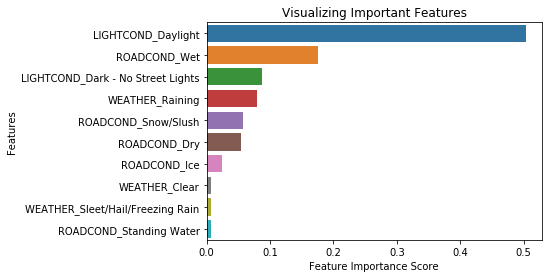

In [58]:
import seaborn as sns
feature_imp = pd.Series(DecTree.feature_importances_,index=X.columns).sort_values(ascending=False)
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# (Evaluating human behavior impact):

In [8]:
df2 = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory=False)
df2.shape

(194673, 38)

In [9]:
# Dropping data where drivers are not drunk
df2['UNDERINFL'].replace(to_replace=['N','Y'], value=['0','1'],inplace=True)
Underinfl=df2[df2['UNDERINFL']=='0'].index
df2.drop(Underinfl,axis=0, inplace=True)
# Dropping data where drivers are attentive
inattentiond=df2[df2['INATTENTIONIND']==''].index
df2.drop(inattentiond,axis=0, inplace=True)
# Dropping NAN in Weather & Light condition & Road Condition
df2.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'], axis=0, inplace=True)
df2.shape

(9098, 38)

In [10]:
# Dropping "Unknown" + "Other" records in Weather & Light condition & Road Condition
Weather1= df2[df2['WEATHER']=='Unknown'].index
Weather2= df2[df2['WEATHER']=='Other'].index
df2.drop(Weather1,axis=0, inplace=True)
df2.drop(Weather2,axis=0, inplace=True)
light1= df2[df2['LIGHTCOND']=='Unknown'].index
light2= df2[df2['LIGHTCOND']=='Other'].index
df2.drop(light1,axis=0, inplace=True)
df2.drop(light2,axis=0, inplace=True)
road1= df2[df2['ROADCOND']=='Unknown'].index
road2= df2[df2['ROADCOND']=='Other'].index
df2.drop(road1,axis=0, inplace=True)
df2.drop(road2,axis=0, inplace=True)
df2.shape

(8980, 38)

In [23]:
df2['WEATHER'].value_counts()

Clear                       5737
Raining                     1796
Overcast                    1362
Fog/Smog/Smoke                45
Snowing                       33
Sleet/Hail/Freezing Rain       4
Severe Crosswind               2
Blowing Sand/Dirt              1
Name: WEATHER, dtype: int64

In [24]:
df2['LIGHTCOND'].value_counts()

Dark - Street Lights On     6494
Daylight                    1885
Dusk                         262
Dark - No Street Lights      139
Dark - Street Lights Off     127
Dawn                          73
Name: LIGHTCOND, dtype: int64

In [25]:
df2['ROADCOND'].value_counts()

Dry               6282
Wet               2610
Snow/Slush          44
Ice                 32
Sand/Mud/Dirt        6
Standing Water       6
Name: ROADCOND, dtype: int64

In [23]:
df2 = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv", low_memory=False)
df2.shape

(194673, 38)

In [9]:
# Dropping data where drivers are attentive
inattentiond=df2[df2['INATTENTIONIND']==''].index
df2.drop(inattentiond,axis=0, inplace=True)
# Dropping NAN in Weather & Light condition & Road Condition
df2.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'], axis=0, inplace=True)
df2.shape

(189337, 38)

In [24]:
# Dropping "Unknown" + "Other" records in Weather & Light condition & Road Condition
Weather1= df2[df2['WEATHER']=='Unknown'].index
Weather2= df2[df2['WEATHER']=='Other'].index
df2.drop(Weather1,axis=0, inplace=True)
df2.drop(Weather2,axis=0, inplace=True)
light1= df2[df2['LIGHTCOND']=='Unknown'].index
light2= df2[df2['LIGHTCOND']=='Other'].index
df2.drop(light1,axis=0, inplace=True)
df2.drop(light2,axis=0, inplace=True)
road1= df2[df2['ROADCOND']=='Unknown'].index
road2= df2[df2['ROADCOND']=='Other'].index
df2.drop(road1,axis=0, inplace=True)
df2.drop(road2,axis=0, inplace=True)
df2.shape

(175216, 38)

In [18]:
# Dropping data where drivers are drunk
df2['UNDERINFL'].replace(to_replace=['N','Y'], value=['0','1'],inplace=True)
Underinfl=df2[df2['UNDERINFL']=='1'].index
df2.drop(Underinfl,axis=0, inplace=True)
# Dropping data where drivers are inattentive
inattentiond=df2[df2['INATTENTIONIND']=='Y'].index
df2.drop(inattentiond,axis=0, inplace=True)
df2.dropna(subset=['WEATHER','ROADCOND','LIGHTCOND'], axis=0, inplace=True)
df2.shape

(151523, 38)

In [25]:
df2['WEATHER'].value_counts()

Clear                       108951
Raining                      32676
Overcast                     26954
Snowing                        831
Fog/Smog/Smoke                 553
Sleet/Hail/Freezing Rain       107
Blowing Sand/Dirt               47
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [26]:
df2['LIGHTCOND'].value_counts()

Daylight                    112673
Dark - Street Lights On      46813
Dusk                          5661
Dawn                          2413
Dark - No Street Lights       1409
Dark - Street Lights Off      1120
Dark - Unknown Lighting          8
Name: LIGHTCOND, dtype: int64

In [27]:
df2['ROADCOND'].value_counts()

Dry               121692
Wet                46378
Ice                 1083
Snow/Slush           837
Standing Water       105
Sand/Mud/Dirt         66
Oil                   60
Name: ROADCOND, dtype: int64